In [148]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

## **Loading the dataset**

In [150]:
df = pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')
df=df.iloc[:,1:]

In [151]:
df=df.drop_duplicates()
df.head()

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## **Exploratory Data Analysis**

In [152]:
df.shape

(2112, 21)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   accelerations                                           2112 non-null   float64
 1   fetal_movement                                          2112 non-null   float64
 2   uterine_contractions                                    2112 non-null   float64
 3   light_decelerations                                     2112 non-null   float64
 4   severe_decelerations                                    2112 non-null   float64
 5   prolongued_decelerations                                2112 non-null   float64
 6   abnormal_short_term_variability                         2112 non-null   float64
 7   mean_value_of_short_term_variability                    2112 non-null   float64
 8   percentage_of_time_with_abnormal_long_

In [154]:
df.isnull().sum()

accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                                            0
histogram_mean                          

In [155]:
df.describe()

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,...,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000
mean,0.003190,0.009511,0.004389,0.001902,0.000003,0.000160,46.981061,1.335511,9.773201,8.167472,...,93.546875,164.103693,4.077178,0.325758,137.448390,134.592330,138.083333,18.916193,0.318182,1.303504
std,0.003872,0.046814,0.002940,0.002966,0.000057,0.000592,17.171788,0.884290,18.313812,5.634115,...,29.558037,17.948559,2.952363,0.707903,16.403636,15.610519,14.479658,29.042726,0.611039,0.614237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,...,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,50.700000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


## **Correlation plot** 

<AxesSubplot:>

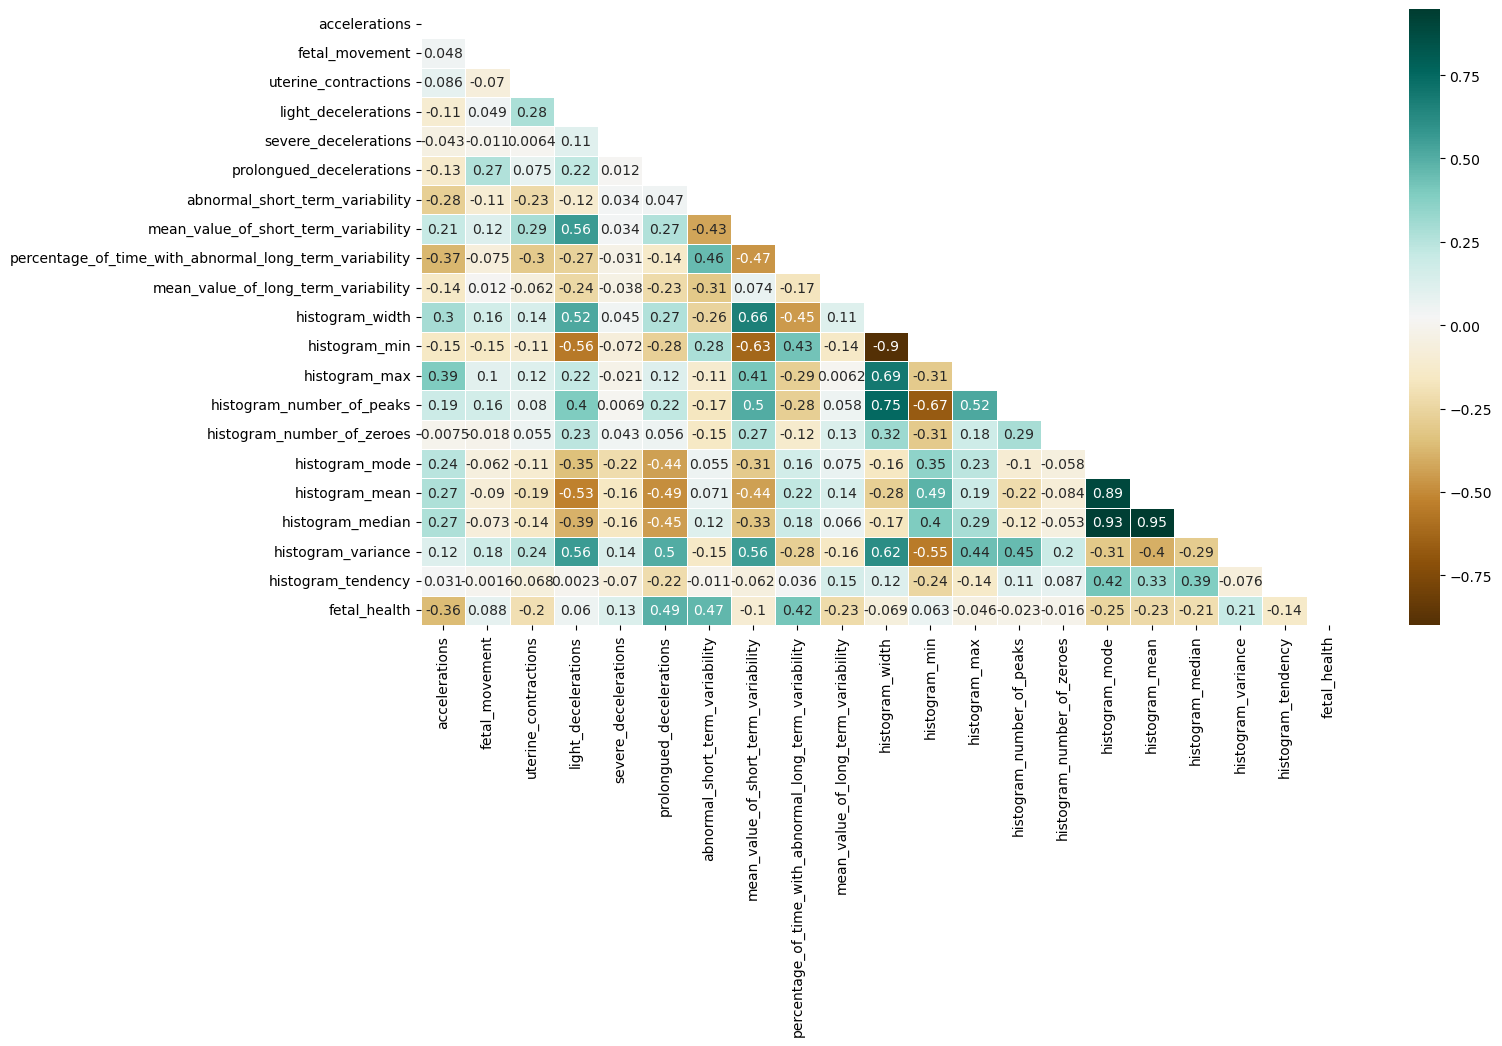

In [156]:
corr = df.corr()
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,cmap='BrBG',annot=True,linewidth=.5,square=False)

## **Correlation of all columns with respect to class**

<AxesSubplot:>

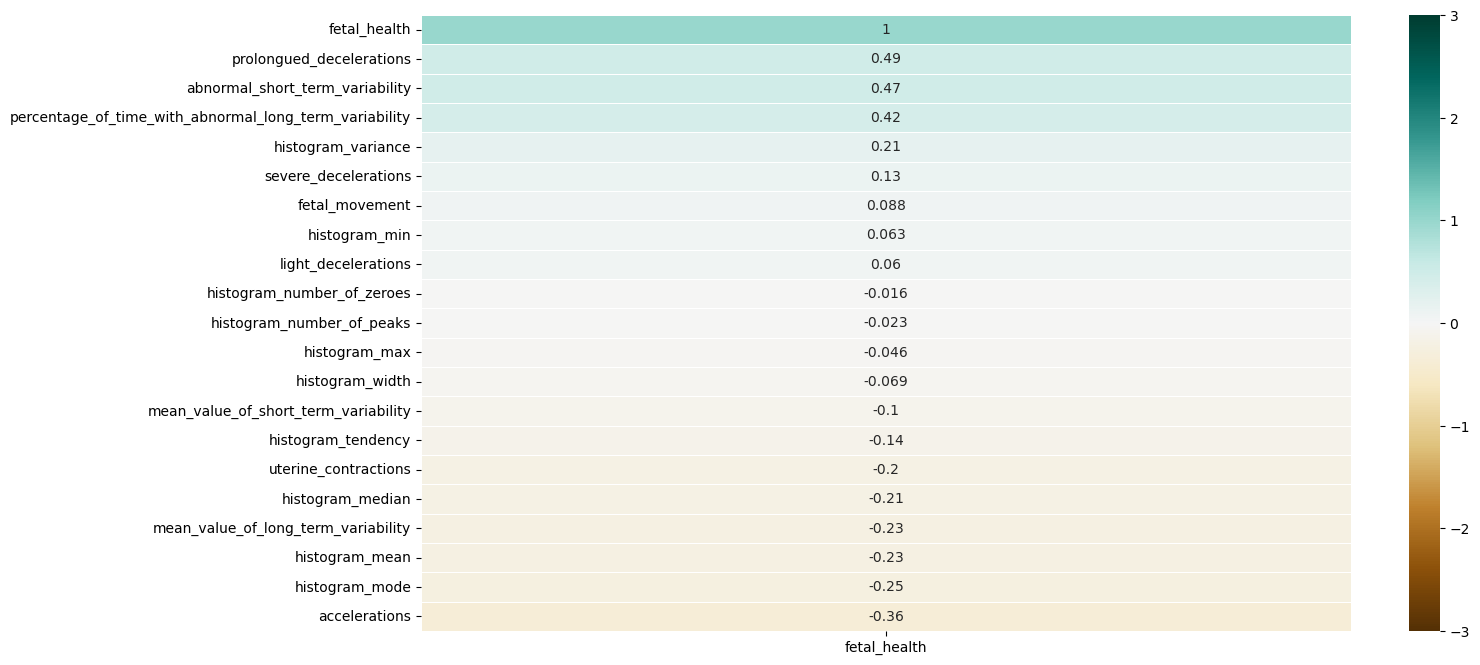

In [157]:
plt.figure(figsize=(15,8))

sns.heatmap(df.corr()[['fetal_health']].sort_values(by='fetal_health', ascending=False),cmap='BrBG', vmin=-3, vmax= 3 , center=0, annot=True,linewidth=.5,square=False)

In [236]:
x=df.drop('fetal_health',axis=1)
y=df['fetal_health']

In [159]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['fetal_health']=le.fit_transform(df['fetal_health'])

In [160]:
for column in x.columns:
    x[column] = (x[column] - x[column].min()) / (x[column].max() - x[column].min()) 
x.head()

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,0.047337,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0
1,0.315789,0.0,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,0.205128,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5
2,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,0.264300,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5
3,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,0.453649,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0
4,0.368421,0.0,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,0.392505,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0


In [161]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.1,stratify=y)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1900, 20)
(212, 20)
(1900,)
(212,)


In [162]:
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(X_train)
x_test = pca.transform(X_test)

In [163]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([5.98047433e-01, 1.57319290e-01, 9.60723218e-02, 7.17305287e-02,
       3.61564735e-02, 2.83195995e-02, 5.99169535e-03, 3.95019578e-03,
       1.47454710e-03, 7.61650212e-04, 9.17104053e-05, 5.74755426e-05,
       2.66198715e-05, 4.55371086e-07, 1.71858342e-09, 1.40774917e-09,
       5.79359987e-10, 3.70914199e-11, 7.46480149e-13, 3.24768840e-32])

## **Decision Tree**

In [164]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42, max_depth=7)
dtc = dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [165]:
from sklearn.metrics import *

dtc_acc = accuracy_score(y_test, y_pred_dtc)
dtc_acc

0.9290780141843972

In [166]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

         1.0       0.94      0.97      0.96       330
         2.0       0.79      0.72      0.76        58
         3.0       1.00      0.89      0.94        35

    accuracy                           0.93       423
   macro avg       0.91      0.86      0.88       423
weighted avg       0.93      0.93      0.93       423



In [167]:
print(confusion_matrix(y_test, y_pred_dtc))

[[320  10   0]
 [ 16  42   0]
 [  3   1  31]]


In [168]:
f1_micro = f1_score(y_test, y_pred_dtc, average='micro')
print("F1-Score: ", f1_micro)


F1-Score:  0.9290780141843973


In [169]:
f1_macro = f1_score(y_test, y_pred_dtc, average='macro')
print("F1-Score: ", f1_macro)


F1-Score:  0.8842674717114178


In [170]:
f1_weighted = f1_score(y_test, y_pred_dtc,average='weighted')
print("F1-Score: ", f1_weighted)


F1-Score:  0.9278150048114746


# Random Forest Classifier

In [171]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc = rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
f1_rfc = f1_score(y_test, y_pred_rfc,average='weighted')

In [172]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc = rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
f1_micro = f1_score(y_test, y_pred_rfc,average='micro')

In [173]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc = rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
f1_macro = f1_score(y_test, y_pred_rfc,average='macro')

In [174]:
print("F1-Score: ", f1_weighted)
print("Accuracy: ", accuracy_score(y_test, y_pred_rfc))

F1-Score:  0.9278150048114746
Accuracy:  0.9527186761229315


In [175]:
print("F1-Score: ", f1_micro)
print("Accuracy: ", accuracy_score(y_test, y_pred_rfc))

F1-Score:  0.9527186761229315
Accuracy:  0.9527186761229315


In [176]:
print("F1-Score: ", f1_macro)
print("Accuracy: ", accuracy_score(y_test, y_pred_rfc))

F1-Score:  0.9116546866393908
Accuracy:  0.9527186761229315


In [177]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       330
         2.0       0.91      0.74      0.82        58
         3.0       0.97      0.91      0.94        35

    accuracy                           0.95       423
   macro avg       0.95      0.88      0.91       423
weighted avg       0.95      0.95      0.95       423



In [178]:
print(confusion_matrix(y_test, y_pred_rfc))

[[328   2   0]
 [ 14  43   1]
 [  1   2  32]]


# LOGISTIC REGRESSION

For the amounts of training data is:  1689
Accuracy of LogisticRegression:  0.8723404255319149


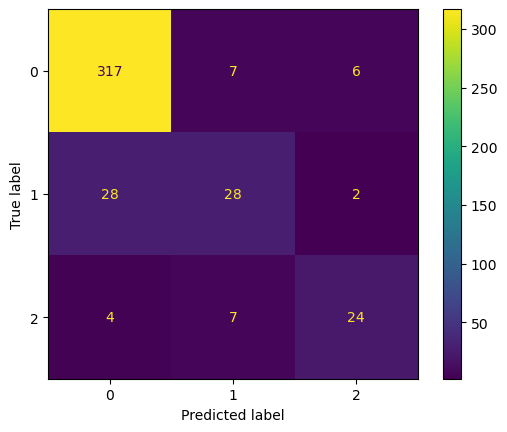

In [194]:
from sklearn.linear_model import LogisticRegression
size = X_train.shape[0]

model = LogisticRegression(max_iter=1000, C=0.009, penalty="l2", solver="newton-cg")
model.fit(X_train, y_train)
print("For the amounts of training data is: ",size)
print("Accuracy of LogisticRegression: ",model.score(X_test,y_test))
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

# DECISION TREE CLASSIFIER

For the amounts of training data is:  1689
Accuracy of DecisionTree:  0.933806146572104


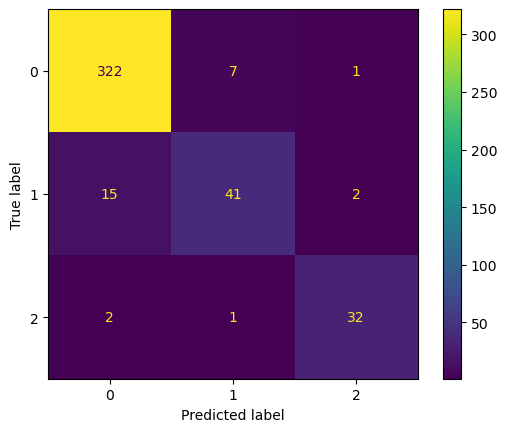

In [195]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("For the amounts of training data is: ",size)
print("Accuracy of DecisionTree: ",model.score(X_test, y_test))
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()


# KNNEIGHBORS CLASSIFIER

For the amounts of training data is:  1689
Accuracy of K-NN: 0.8865248226950354


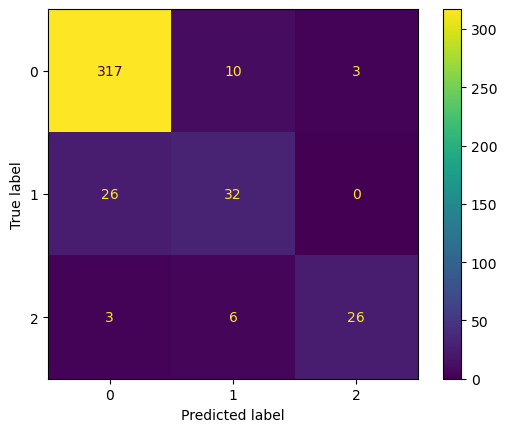

In [198]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
print("For the amounts of training data is: ",size)
print("Accuracy of K-NN:",model.score(X_test, y_test))
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

# ADABOOST CLASSIFIER

For the amounts of training data is:  1689
Accuracy of AdaBoost: 0.91725768321513


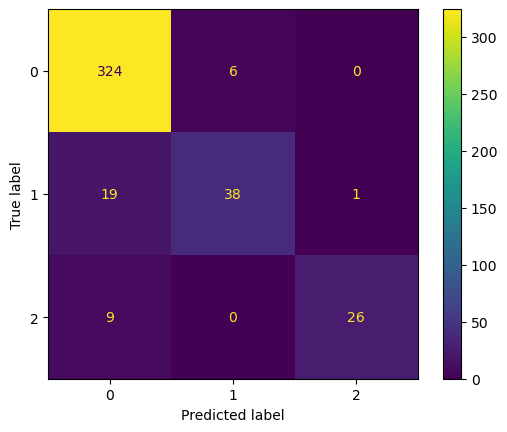

In [199]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=250, learning_rate=0.1)
model.fit(X_train, y_train)
print("For the amounts of training data is: ",size)
print("Accuracy of AdaBoost:",model.score(X_test, y_test))
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

In [200]:
model = LogisticRegression(max_iter=1000, C=0.01, penalty="l2", solver="newton-cg")
model.fit(X_train, y_train)
print("For the C is : 0.01 ,Accuracy : ",model.score(X_test,y_test))

model = LogisticRegression(max_iter=1000, C=0.001, penalty="l2", solver="newton-cg")
model.fit(X_train, y_train)
print("For the C is : 0.001 ,Accuracy : ",model.score(X_test,y_test))

model = LogisticRegression(max_iter=1000, C=0.0001, penalty="l2", solver="newton-cg")
model.fit(X_train, y_train)
print("For the C is : 0.0001 ,Accuracy : ",model.score(X_test,y_test))

For the C is : 0.01 ,Accuracy :  0.8747044917257684
For the C is : 0.001 ,Accuracy :  0.8723404255319149
For the C is : 0.0001 ,Accuracy :  0.851063829787234


In [201]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print("For the n_neighbors is 3, Accuracy :",model.score(X_test, y_test))

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
print("For the n_neighbors is 5, Accuracy :",model.score(X_test, y_test))

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
print("For the n_neighbors is 7, Accuracy :",model.score(X_test, y_test))

For the n_neighbors is 3, Accuracy : 0.8936170212765957
For the n_neighbors is 5, Accuracy : 0.8865248226950354
For the n_neighbors is 7, Accuracy : 0.8770685579196218


In [214]:



X_train1 = X_train.iloc[:1400,:]
y_train1 = y_train.iloc[:1400]
size = X_train1.shape[0]

model = LogisticRegression(max_iter=1000, C=0.009, penalty="l2", solver="newton-cg")
model.fit(X_train1, y_train1)
print("For the amounts of training data is: ",size)
print("Accuracy of LogisticRegression: ",model.score(X_test,y_test))
print(" ")

model = DecisionTreeClassifier()
model.fit(X_train1, y_train1)
print("For the amounts of training data is: ",size)
print("Accuracy of DecisionTree: ",model.score(X_test, y_test))
print(" ")

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train1, y_train1)
print("For the amounts of training data is: ",size)
print("Accuracy of K-NN:",model.score(X_test, y_test))
print(" ")

model = AdaBoostClassifier(n_estimators=250, learning_rate=0.1)
model.fit(X_train1, y_train1)
print("For the amounts of training data is: ",size)
print("Accuracy of AdaBoost:",model.score(X_test, y_test))
print(" ")

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc = rfc.fit(X_train, y_train)
print("For the amounts of training data is: ",size)
print("Accuracy of RandomForestClassifier :",model.score(X_test, y_test))
print(" ")

For the amounts of training data is:  1400
Accuracy of LogisticRegression:  0.7807570977917981
 
For the amounts of training data is:  1400
Accuracy of DecisionTree:  0.9211356466876972
 
For the amounts of training data is:  1400
Accuracy of K-NN: 0.9132492113564669
 
For the amounts of training data is:  1400
Accuracy of AdaBoost: 0.9132492113564669
 
For the amounts of training data is:  1400
Accuracy of RandomForestClassifier : 0.9132492113564669
 


(2112, 20)